In [2]:
# conda install -c conda-forge wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [4]:
## conda install -c conda-forge wordcloud
import os

# for handling dataframe
import re
import csv
import pandas as pd
import numpy as np

# for BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# for wordcloud
import matplotlib.pylab as plt
from wordcloud import WordCloud
from PIL import Image

# working directory setting
# work_dir = 'D:/Document/project/HYStudy/scripts'
# os.chdir(work_dir)

## 데이터 불러오기

In [8]:
raw_text = pd.read_csv('DB2018.csv', encoding='utf-8')
raw_text.head()

,타임스탬프,1. 본 수업을 정정기간에 신청하셨습니까?,2. 이번 수강이 재수강입니까?,3. 학생은 몇학년 입니까?,4. 수업과 관련하여 기대하는 점은 무엇입니까?,5. 수강동기를 자유롭게 적어주시기 바랍니다.,6. 본 강의에 대한 기대 정도는?,7. 개인식별 정보(학번 뒷 네자리)를 적어주시기 바랍니다.
0,3.14.2018 9:36:06,아니오,아니오,4학년,파이썬이 뭔지 제대로 익히고 싶습니다.,빅데이터 연구모임에서 파이썬을 배웠는데 잘 이해가 안 갔습니다. 다시 배우고 싶어서...,5,6744
1,3.14.2018 9:36:12,아니오,아니오,4학년,파이썬 툴 다루는 법 및 데이터 분석을 잘하고 싶습니다,데이터 분석에 관심이 있어서 신청함,4,3220
2,3.14.2018 9:36:27,네,아니오,4학년,소프트웨어를 통한 데이터분석,다른수업을 듣다보니 데이터분석에 대한 필요성을 알게되어서,4,9149
3,3.14.2018 9:36:30,아니오,아니오,4학년,파이썬에 대한 이해,컴퓨터 언어를 배워보고 싶었다.,3,2251
4,3.14.2018 9:36:34,아니오,아니오,4학년,실용적인 능력을 기르는 것,재미있을 것 같아서,5,9734


In [16]:
# 수업에 대한 기대 데이터
raw_text_expect = raw_text.loc[:,"4. 수업과 관련하여 기대하는 점은 무엇입니까?"]
raw_text_expect.head()

0             파이썬이 뭔지 제대로 익히고 싶습니다.
1    파이썬 툴 다루는 법 및 데이터 분석을 잘하고 싶습니다
2                   소프트웨어를 통한 데이터분석
3                        파이썬에 대한 이해
4                    실용적인 능력을 기르는 것
Name: 4. 수업과 관련하여 기대하는 점은 무엇입니까?, dtype: object

In [17]:
# 수업에 대한 동기 데이터
raw_text_motivation = raw_text.loc[:,"5. 수강동기를 자유롭게 적어주시기 바랍니다."]
raw_text_motivation.head()

0    빅데이터 연구모임에서 파이썬을 배웠는데 잘 이해가 안 갔습니다. 다시 배우고 싶어서...
1                                  데이터 분석에 관심이 있어서 신청함
2                      다른수업을 듣다보니 데이터분석에 대한 필요성을 알게되어서
3                                    컴퓨터 언어를 배워보고 싶었다.
4                                           재미있을 것 같아서
Name: 5. 수강동기를 자유롭게 적어주시기 바랍니다., dtype: object

### Corpus 만들기

In [20]:
corpus1 = np.array(raw_text_expect)
print(len(corpus1))
print(corpus1[0:3])

44
['파이썬이 뭔지 제대로 익히고 싶습니다.' '파이썬 툴 다루는 법 및 데이터 분석을 잘하고 싶습니다' '소프트웨어를 통한 데이터분석']


### Bag-Of-Words 만들기

In [21]:
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus = tf_vectorizer.fit(corpus1)
tf_bow = tf_vectorizer.fit_transform(corpus1)
tf_bow

<44x172 sparse matrix of type '<class 'numpy.int64'>'
	with 230 stored elements in Compressed Sparse Row format>

In [22]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tfidf_corpus = tf_vectorizer.fit(corpus1)
tfidf_bow = tfidf_vectorizer.fit_transform(corpus1)
tfidf_bow

<44x172 sparse matrix of type '<class 'numpy.float64'>'
	with 230 stored elements in Compressed Sparse Row format>

In [26]:
# check vocabulary in TDM
print(len(tf_corpus.vocabulary_))
print(len(tf_corpus.get_feature_names()))
tf_vectorizer.get_feature_names()[0:10]

172
172


['it라는', 'ㅡㅡ', '가지고', '같다', '같습니다', '같아서', '같은데', '개념', '것들을', '것이라고']

In [27]:
# frequency count
tf_word_sum = tf_bow.toarray().sum(axis=0)
tf_word_name = tf_corpus.get_feature_names()
tf_word_dict = {}

for i in range(len(tf_word_sum)):
    tf_word_dict[tf_word_name[i]] = tf_word_sum[i]
    
print(tf_corpus.get_feature_names())
print(tf_word_sum)

['it라는', 'ㅡㅡ', '가지고', '같다', '같습니다', '같아서', '같은데', '개념', '것들을', '것이라고', '결론을', '경영과목이므로', '경영을', '계발', '공모전을', '공부', '관련하여', '궁금하고', '기대가', '기대한다', '기대합니다', '기르는', '기를', '기법을', '기초', '기초를', '기초적인', '기회가', '끝난', '나아가', '나오길', '능력', '능력을', '다루는', '다룰', '다양한', '대략적인', '대한', '대해', '대해서', '데이터', '데이터를', '데이터베이스', '데이터분석', '데이터분석에', '데이터분석을', '데이터정도는', '데이터처리와', '도움이', '도출하는', '되길', '되는', '됩니다', '뒤쳐지지', '듣는', '따라갈', '많이', '뭐라도', '뭔지', '방법에', '방법을', '배우고', '배우는', '배울', '배워가고싶다', '부분들을', '분석', '분석력을', '분석을', '빅데이터', '사용', '새로운', '생각', '생소한', '소프트웨어를', '수업은', '수업이', '수집', '수집과', '수집할', '숙달하고싶습니다', '쉽게알려주시면', '습득', '습득하고', '실력을', '실무적인', '실습위주의', '실용적인', '실제로', '싶다', '싶습니다', '쓰이는지', '않게', '않고', '알고', '알려주셨으면', '알아가는', '알아갔으면한다', '어떤식으로', '어떻게', '어려울', '어렵지', '언어', '얻는게', '역량', '용이하게', '위해', '유익한', '응용', '의미있는', '이해', '이해증진', '이해하고', '익히고', '익힐', '있게', '있는', '있었으면', '있으면', '있을', '있을것', '자료를', '잘하게', '잘하고', '전반적', '전반적인', '접한다는', '정도', '제대로', '조금이나마', '좋게', '좋겠다', '지식', '지식과', '지식에', '지식을', '진행될지',

In [28]:
# word & index number
tf_word_dict

{'it라는': 1,
 'ㅡㅡ': 1,
 '가지고': 1,
 '같다': 1,
 '같습니다': 1,
 '같아서': 1,
 '같은데': 1,
 '개념': 1,
 '것들을': 1,
 '것이라고': 1,
 '결론을': 1,
 '경영과목이므로': 1,
 '경영을': 1,
 '계발': 2,
 '공모전을': 1,
 '공부': 1,
 '관련하여': 1,
 '궁금하고': 1,
 '기대가': 2,
 '기대한다': 1,
 '기대합니다': 1,
 '기르는': 1,
 '기를': 1,
 '기법을': 1,
 '기초': 1,
 '기초를': 1,
 '기초적인': 3,
 '기회가': 2,
 '끝난': 1,
 '나아가': 1,
 '나오길': 1,
 '능력': 3,
 '능력을': 2,
 '다루는': 2,
 '다룰': 1,
 '다양한': 1,
 '대략적인': 1,
 '대한': 7,
 '대해': 1,
 '대해서': 1,
 '데이터': 11,
 '데이터를': 1,
 '데이터베이스': 1,
 '데이터분석': 1,
 '데이터분석에': 1,
 '데이터분석을': 2,
 '데이터정도는': 1,
 '데이터처리와': 1,
 '도움이': 1,
 '도출하는': 1,
 '되길': 2,
 '되는': 2,
 '됩니다': 2,
 '뒤쳐지지': 1,
 '듣는': 1,
 '따라갈': 1,
 '많이': 1,
 '뭐라도': 1,
 '뭔지': 1,
 '방법에': 1,
 '방법을': 1,
 '배우고': 1,
 '배우는': 1,
 '배울': 1,
 '배워가고싶다': 1,
 '부분들을': 1,
 '분석': 5,
 '분석력을': 1,
 '분석을': 3,
 '빅데이터': 1,
 '사용': 1,
 '새로운': 1,
 '생각': 1,
 '생소한': 1,
 '소프트웨어를': 1,
 '수업은': 1,
 '수업이': 1,
 '수집': 1,
 '수집과': 1,
 '수집할': 1,
 '숙달하고싶습니다': 1,
 '쉽게알려주시면': 1,
 '습득': 1,
 '습득하고': 1,
 '실력을': 1,
 '실무적인': 1,
 '실습위주의': 1,
 '실용적인':

In [30]:
# check vocabulary in TDM
print(len(tfidf_corpus.vocabulary_))
print(len(tfidf_corpus.get_feature_names()))
tfidf_vectorizer.get_feature_names()

172
172


['it라는',
 'ㅡㅡ',
 '가지고',
 '같다',
 '같습니다',
 '같아서',
 '같은데',
 '개념',
 '것들을',
 '것이라고',
 '결론을',
 '경영과목이므로',
 '경영을',
 '계발',
 '공모전을',
 '공부',
 '관련하여',
 '궁금하고',
 '기대가',
 '기대한다',
 '기대합니다',
 '기르는',
 '기를',
 '기법을',
 '기초',
 '기초를',
 '기초적인',
 '기회가',
 '끝난',
 '나아가',
 '나오길',
 '능력',
 '능력을',
 '다루는',
 '다룰',
 '다양한',
 '대략적인',
 '대한',
 '대해',
 '대해서',
 '데이터',
 '데이터를',
 '데이터베이스',
 '데이터분석',
 '데이터분석에',
 '데이터분석을',
 '데이터정도는',
 '데이터처리와',
 '도움이',
 '도출하는',
 '되길',
 '되는',
 '됩니다',
 '뒤쳐지지',
 '듣는',
 '따라갈',
 '많이',
 '뭐라도',
 '뭔지',
 '방법에',
 '방법을',
 '배우고',
 '배우는',
 '배울',
 '배워가고싶다',
 '부분들을',
 '분석',
 '분석력을',
 '분석을',
 '빅데이터',
 '사용',
 '새로운',
 '생각',
 '생소한',
 '소프트웨어를',
 '수업은',
 '수업이',
 '수집',
 '수집과',
 '수집할',
 '숙달하고싶습니다',
 '쉽게알려주시면',
 '습득',
 '습득하고',
 '실력을',
 '실무적인',
 '실습위주의',
 '실용적인',
 '실제로',
 '싶다',
 '싶습니다',
 '쓰이는지',
 '않게',
 '않고',
 '알고',
 '알려주셨으면',
 '알아가는',
 '알아갔으면한다',
 '어떤식으로',
 '어떻게',
 '어려울',
 '어렵지',
 '언어',
 '얻는게',
 '역량',
 '용이하게',
 '위해',
 '유익한',
 '응용',
 '의미있는',
 '이해',
 '이해증진',
 '이해하고',
 '익히고',
 '익힐',
 '있게',
 '있는',
 '있었으면',
 '있으면',
 '있을',
 

In [31]:
# frequency count
tfidf_word_sum = tfidf_bow.toarray().sum(axis=0)
tfidf_word_name = tfidf_corpus.get_feature_names()
tfidf_word_dict = {}

for i in range(len(tfidf_word_sum)):
    tfidf_word_dict[tfidf_word_name[i]] = tfidf_word_sum[i]
    
print(tfidf_corpus.get_feature_names())
print(tfidf_word_sum)

['it라는', 'ㅡㅡ', '가지고', '같다', '같습니다', '같아서', '같은데', '개념', '것들을', '것이라고', '결론을', '경영과목이므로', '경영을', '계발', '공모전을', '공부', '관련하여', '궁금하고', '기대가', '기대한다', '기대합니다', '기르는', '기를', '기법을', '기초', '기초를', '기초적인', '기회가', '끝난', '나아가', '나오길', '능력', '능력을', '다루는', '다룰', '다양한', '대략적인', '대한', '대해', '대해서', '데이터', '데이터를', '데이터베이스', '데이터분석', '데이터분석에', '데이터분석을', '데이터정도는', '데이터처리와', '도움이', '도출하는', '되길', '되는', '됩니다', '뒤쳐지지', '듣는', '따라갈', '많이', '뭐라도', '뭔지', '방법에', '방법을', '배우고', '배우는', '배울', '배워가고싶다', '부분들을', '분석', '분석력을', '분석을', '빅데이터', '사용', '새로운', '생각', '생소한', '소프트웨어를', '수업은', '수업이', '수집', '수집과', '수집할', '숙달하고싶습니다', '쉽게알려주시면', '습득', '습득하고', '실력을', '실무적인', '실습위주의', '실용적인', '실제로', '싶다', '싶습니다', '쓰이는지', '않게', '않고', '알고', '알려주셨으면', '알아가는', '알아갔으면한다', '어떤식으로', '어떻게', '어려울', '어렵지', '언어', '얻는게', '역량', '용이하게', '위해', '유익한', '응용', '의미있는', '이해', '이해증진', '이해하고', '익히고', '익힐', '있게', '있는', '있었으면', '있으면', '있을', '있을것', '자료를', '잘하게', '잘하고', '전반적', '전반적인', '접한다는', '정도', '제대로', '조금이나마', '좋게', '좋겠다', '지식', '지식과', '지식에', '지식을', '진행될지',

In [32]:
# word & index number
tfidf_word_dict

{'it라는': 0.35776909408350632,
 'ㅡㅡ': 1.0,
 '가지고': 0.34719920397222376,
 '같다': 0.48120479378700709,
 '같습니다': 0.32327648985988866,
 '같아서': 0.26148678845156598,
 '같은데': 0.52048159166937313,
 '개념': 0.3161025489400604,
 '것들을': 0.383128325270649,
 '것이라고': 0.35776909408350632,
 '결론을': 0.33176989277064933,
 '경영과목이므로': 0.26148678845156598,
 '경영을': 0.383128325270649,
 '계발': 0.50226134846252102,
 '공모전을': 0.25113067423126051,
 '공부': 0.46895482295914165,
 '관련하여': 0.3161025489400604,
 '궁금하고': 0.26148678845156598,
 '기대가': 0.59098839325712904,
 '기대한다': 0.51147492679699924,
 '기대합니다': 0.40824829046386302,
 '기르는': 0.59627654264446672,
 '기를': 0.48120479378700709,
 '기법을': 0.33176989277064933,
 '기초': 0.34719920397222376,
 '기초를': 0.32327648985988866,
 '기초적인': 1.209870597579195,
 '기회가': 0.61391559886666403,
 '끝난': 0.34719920397222376,
 '나아가': 0.33176989277064933,
 '나오길': 0.40824829046386302,
 '능력': 1.4179215273992785,
 '능력을': 0.83656982235318034,
 '다루는': 0.73562065731330684,
 '다룰': 0.36667364250798756,
 '다양한'

In [33]:
tf_cooccur = (tf_bow.T * tf_bow) # co-occurrence matrix in sparse csr format
tf_cooccur.setdiag(0) # fill same word cooccurence to 0
print(tf_cooccur.todense()) # print out matrix in dense format
tf_cooccur

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


<172x172 sparse matrix of type '<class 'numpy.int64'>'
	with 1538 stored elements in Compressed Sparse Column format>

In [34]:
# create co-occurence matrix to pandas dataframe
tf_df = pd.DataFrame(data=tf_cooccur.todense(),
             index=tf_corpus.vocabulary_.keys(),
             columns=tf_corpus.vocabulary_.keys())
tf_df[0:10]

,다룰,지식을,끝난,잘하고,테크닉,실제로,실무적인,사용,있을것,이해하고,...,습득,파이썬을,배우는,알아가는,유익한,제대로,기를,뭐라도,같습니다,알아갔으면한다
다룰,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
지식을,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
끝난,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
잘하고,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
테크닉,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
실제로,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
실무적인,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
사용,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
있을것,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
이해하고,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


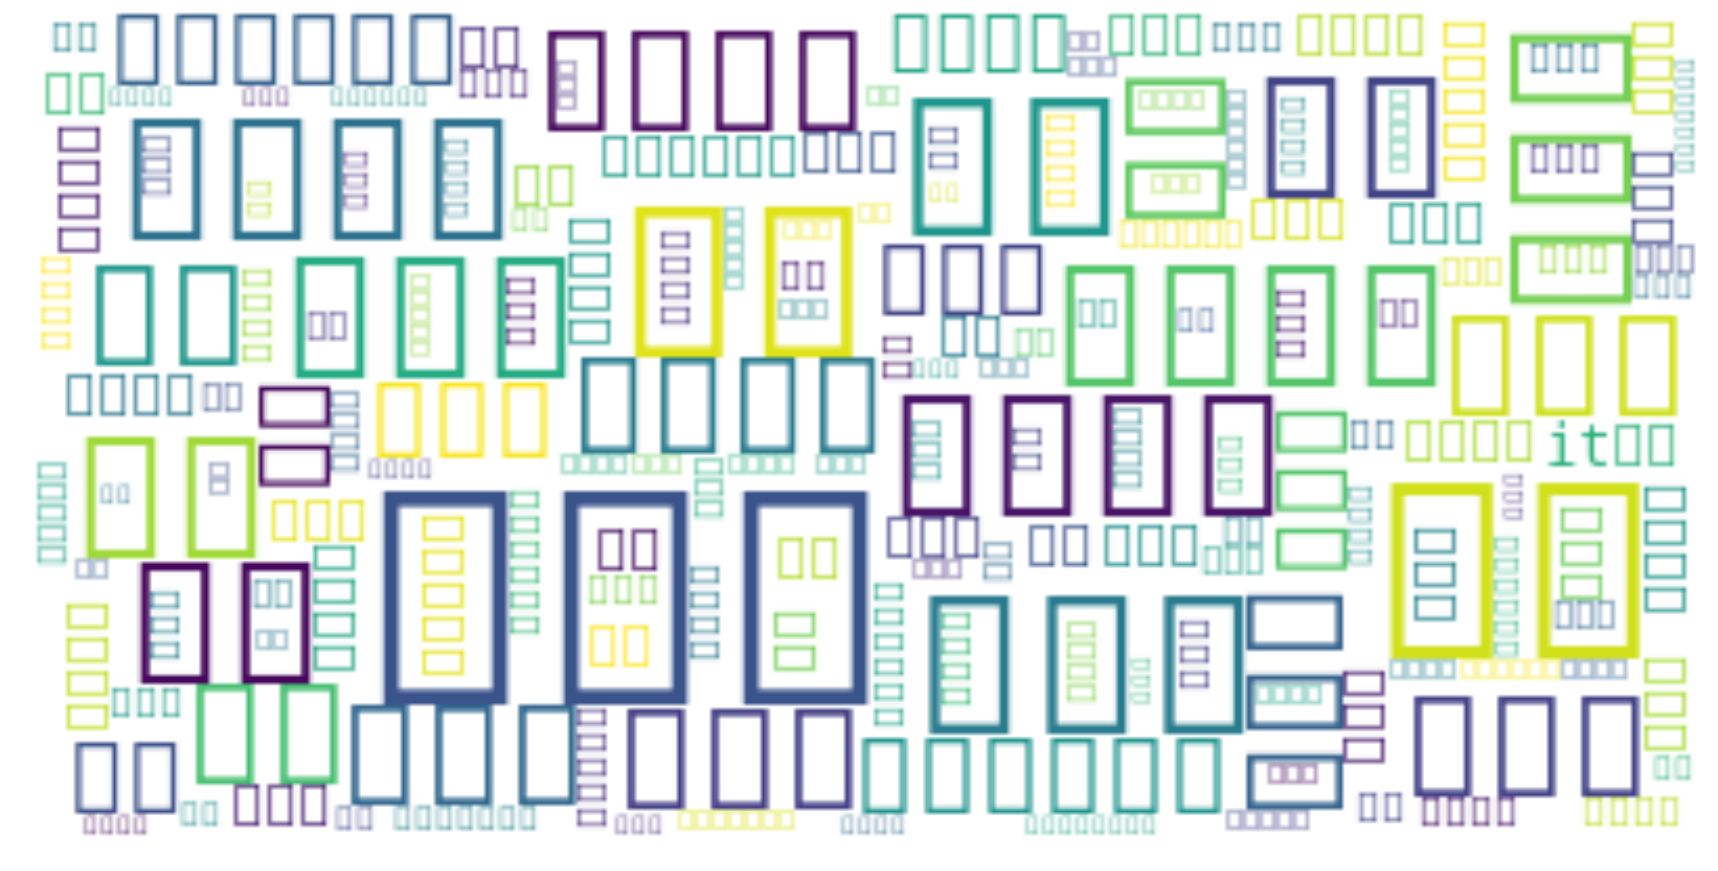

In [37]:
# use Korean font, set mask image
# font_path = 'C:/Windows/Fonts/NanumBarunGothicBold.otf'
# mask_image = np.array(Image.open('D:/Document/project/HYStudy/scripts/[HYStudy 17th] mask_image.jpg'))

# Generate a word cloud image and display
wordcloud = WordCloud(max_font_size=72,
                     # font_path=font_path,
                      background_color='white',
                      #mask=mask_image,
                     ).generate_from_frequencies(tf_word_dict)

plt.figure(figsize=(30, 90))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()